## Importar librerías

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carga de la base de datos

In [4]:
ruta = "../data_ecommerce_customer_churn.csv"

datos = pd.read_csv(ruta)

# Exploracion de Datos

In [5]:
datos.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [6]:
datos.tail()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


### Exploracion

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [8]:
datos.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [9]:
datos['MaritalStatus'].value_counts()

MaritalStatus
Married     2055
Single      1310
Divorced     576
Name: count, dtype: int64

In [10]:
datos['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

### Control de valores nulos

No hay valores nulos en el dataset

In [11]:
datos.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

# Limpieza

### Renombrar variables

In [12]:
datos.rename(columns={
    'Tenure': 'Antiguedad',
    'WarehouseToHome': 'Distancia_Almacen',
    'NumberOfDeviceRegistered': 'Numero_Dispositivos',
    'PreferedOrderCat': 'Categoria_Preferida',
    'SatisfactionScore': 'Nivel_Satisfaccion',
    'MaritalStatus': 'Estado_Civil',
    'NumberOfAddress': 'Numero_Direcciones',
    'Complain': 'Queja',
    'DaySinceLastOrder': 'Dias_Ultima_Compra',
    'CashbackAmount': 'Monto_Cashback',
    'Churn': 'Target'
}, inplace=True)

In [13]:
datos.head()

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Categoria_Preferida,Nivel_Satisfaccion,Estado_Civil,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Cambio de tipo de variable

In [14]:
datos['Estado_Civil'] = datos['Estado_Civil'].astype('string')

In [15]:
datos['Categoria_Preferida'] = datos['Categoria_Preferida'].astype('string')

In [16]:
datos['Estado_Civil'] = datos['Estado_Civil'].str.lower()
datos['Estado_Civil'].value_counts()

Estado_Civil
married     2055
single      1310
divorced     576
Name: count, dtype: Int64

In [17]:
datos['Categoria_Preferida'] = datos['Categoria_Preferida'].str.lower()
datos['Categoria_Preferida'].value_counts()

Categoria_Preferida
laptop & accessory    1458
mobile phone           887
fashion                585
mobile                 559
grocery                273
others                 179
Name: count, dtype: Int64

### Datos Duplicados

In [18]:
datos.duplicated().sum()

np.int64(671)

### Escalado de variables 

### Tratamiento de valores nulos

=== Porcentaje de valores nulos ===
Dias_Ultima_Compra    5.404720
Antiguedad            4.922608
Distancia_Almacen     4.288252
dtype: float64


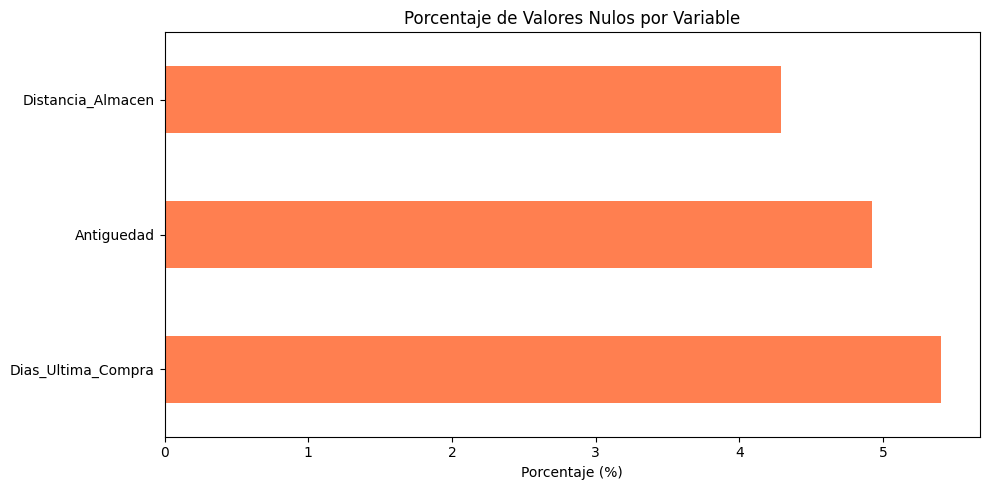

In [19]:
# Análisis de valores nulos por variable y su relación con Churn
print("=== Porcentaje de valores nulos ===")
nulos_porcentaje = (datos.isnull().sum() / len(datos) * 100).sort_values(ascending=False)
print(nulos_porcentaje[nulos_porcentaje > 0])

# Visualización
if nulos_porcentaje[nulos_porcentaje > 0].shape[0] > 0:
    plt.figure(figsize=(10, 5))
    nulos_porcentaje[nulos_porcentaje > 0].plot(kind='barh', color='coral')
    plt.title('Porcentaje de Valores Nulos por Variable')
    plt.xlabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()

In [20]:
# Imputación de valores nulos
# Para Antiguedad, Distancia_Almacen y Dias_Ultima_Compra usamos la mediana
# ya que son menos sensibles a outliers

if datos['Antiguedad'].isnull().sum() > 0:
    datos['Antiguedad'].fillna(datos['Antiguedad'].median(), inplace=True)
    
if datos['Distancia_Almacen'].isnull().sum() > 0:
    datos['Distancia_Almacen'].fillna(datos['Distancia_Almacen'].median(), inplace=True)
    
if datos['Dias_Ultima_Compra'].isnull().sum() > 0:
    # Para días desde última compra, podríamos usar la mediana o un valor específico
    # que indique "hace mucho tiempo"
    datos['Dias_Ultima_Compra'].fillna(datos['Dias_Ultima_Compra'].median(), inplace=True)

print("\nValores nulos después de imputación:")
print(datos.isnull().sum())


Valores nulos después de imputación:
Antiguedad             0
Distancia_Almacen      0
Numero_Dispositivos    0
Categoria_Preferida    0
Nivel_Satisfaccion     0
Estado_Civil           0
Numero_Direcciones     0
Queja                  0
Dias_Ultima_Compra     0
Monto_Cashback         0
Target                 0
dtype: int64


C:\Users\etien\AppData\Local\Temp\ipykernel_4484\2341299891.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Antiguedad'].fillna(datos['Antiguedad'].median(), inplace=True)
C:\Users\etien\AppData\Local\Temp\ipykernel_4484\2341299891.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [21]:
datos['Queja'] = datos['Queja'].astype(int)
datos.head()

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Categoria_Preferida,Nivel_Satisfaccion,Estado_Civil,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
0,15.0,29.0,4,laptop & accessory,3,single,2,0,7.0,143.32,0
1,7.0,25.0,4,mobile,1,married,2,0,7.0,129.29,0
2,27.0,13.0,3,laptop & accessory,1,married,5,0,7.0,168.54,0
3,20.0,25.0,4,fashion,3,divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,others,4,single,8,0,8.0,322.17,0


In [22]:
datos['Target'] = datos['Target'].astype(int)
datos.head()

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Categoria_Preferida,Nivel_Satisfaccion,Estado_Civil,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
0,15.0,29.0,4,laptop & accessory,3,single,2,0,7.0,143.32,0
1,7.0,25.0,4,mobile,1,married,2,0,7.0,129.29,0
2,27.0,13.0,3,laptop & accessory,1,married,5,0,7.0,168.54,0
3,20.0,25.0,4,fashion,3,divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,others,4,single,8,0,8.0,322.17,0


In [23]:
datos.describe()

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Nivel_Satisfaccion,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,10.028165,15.579802,3.679269,3.088302,4.237757,0.282416,4.448871,176.707419,0.171023
std,8.290290,8.275800,1.013938,1.381832,2.626699,0.450232,3.583909,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


# Guardado del dataset

In [ ]:
#ruta_guardado = "../datos/dataset_ecommerce_limpio.csv"
#datos.to_csv(ruta_guardado, index=False)

# Carga del nuevo dataset

In [ ]:
ruta_2 = "../datos/dataset_ecommerce_limpio.csv"
datos = pd.read_csv(ruta_2)

### Selección de variables relevantes de comportamiento

In [36]:
variables_comportamiento = [
    "Antiguedad",
    "Distancia_Almacen",
    "Numero_Dispositivos",
    "Nivel_Satisfaccion",
    "Numero_Direcciones",
    "Queja",
    "Dias_Ultima_Compra",
    "Monto_Cashback",
    "Target"
]

In [60]:
vars_continuas = ['Antiguedad', 'Monto_Cashback', 'Distancia_Almacen', 'Dias_Ultima_Compra']
vars_discretas = ['Numero_Direcciones', 'Numero_Dispositivos', 'Nivel_Satisfaccion', 'Queja']

# Analisis Univariado

## Separarcion de  variables numéricas y categóricas 

In [40]:
datos_comportamiento = datos[variables_comportamiento]

numericas = datos_comportamiento.select_dtypes(include=['int64', 'float64'])
categoricas = datos_comportamiento.select_dtypes(include=['object', 'string'])

print("Variables numéricas de comportamiento:", numericas.columns.tolist())
print("Variables categóricas de comportamiento:", categoricas.columns.tolist())

Variables numéricas de comportamiento: ['Antiguedad', 'Distancia_Almacen', 'Numero_Dispositivos', 'Nivel_Satisfaccion', 'Numero_Direcciones', 'Queja', 'Dias_Ultima_Compra', 'Monto_Cashback', 'Target']
Variables categóricas de comportamiento: []


## Análisis Estadístico

In [41]:
def analisis_descriptivo(datos, nombre_variable):
    """
    Realiza un análisis descriptivo completo de una variable numérica.

    Args:
        datos (pd.Series): Serie de pandas con los datos a analizar
        nombre_variable (str): Nombre de la variable para los resultados

    Returns:
        dict: Diccionario con todas las medidas estadísticas
    """
    if isinstance(datos, pd.Series):
        datos_series = datos
    else:
        datos_series = pd.Series(datos)

    # Cálculos básicos
    modas = datos_series.mode()
    moda = modas[0] if not modas.empty else None

    q1 = datos_series.quantile(0.25)
    q3 = datos_series.quantile(0.75)
    iqr = q3 - q1

    # Detección de outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = datos_series[(datos_series < limite_inferior) | (datos_series > limite_superior)]

    # Resultados numéricos
    resultados = {
        'Variable': nombre_variable,
        'N': int(len(datos_series)),
        'Media': float(datos_series.mean()),
        'Mediana': float(datos_series.median()),
        'Moda': float(moda) if moda is not None else None,
        'Mínimo': int(datos_series.min()),
        'Máximo': float(datos_series.max()),
        'Rango': float(datos_series.max() - datos_series.min()),
        'Varianza': float(datos_series.var(ddof=0)),
        'Desviación Estándar': float(datos_series.std(ddof=0)),
        'Coeficiente de Variación': float((datos_series.std(ddof=0) / datos_series.mean()) * 100) if datos_series.mean() != 0 else float('nan'),
        'Q1': float(q1),
        'Q3': float(q3),
        'Rango Intercuartílico': int(iqr),
        'Asimetría': float(datos_series.skew()),
        'Curtosis': float(datos_series.kurtosis() + 3),
        'Número de Outliers': int(len(outliers)),
        'Porcentaje Outliers': float(len(outliers)/len(datos_series)*100)
    }

    # Interpretación automática
    skew = resultados['Asimetría']
    kurt = resultados['Curtosis']
    cv = resultados['Coeficiente de Variación']

    interpretacion = {
        'Asimetría': 'Asimetría positiva fuerte (cola derecha)' if skew > 1 else
                     'Asimetría positiva moderada' if skew > 0.5 else
                     'Simétrica' if -0.5 <= skew <= 0.5 else
                     'Asimetría negativa moderada' if skew < -0.5 else
                     'Asimetría negativa fuerte (cola izquierda)',
        'Curtosis': 'Distribución muy leptocúrtica (puntiaguda con colas pesadas)' if kurt > 4 else
                    'Distribución leptocúrtica' if kurt > 3 else
                    'Distribución mesocúrtica (normal)' if 2.5 <= kurt <= 3.5 else
                    'Distribución platicúrtica (plana)',
        'Variabilidad': 'Variabilidad extremadamente alta' if cv > 100 else
                        'Variabilidad muy alta' if cv > 50 else
                        'Variabilidad moderada' if cv > 20 else
                        'Variabilidad baja'
    }

    resultados['Interpretación'] = interpretacion
    return resultados

In [42]:
for col in numericas.columns:
    resultados = analisis_descriptivo(numericas[col], col)
    print(f"\nAnálisis descriptivo de la variable '{col}':")
    for clave, valor in resultados.items():
        if clave != 'Interpretación':
            print(f"  {clave}: {valor}")
    print("  Interpretación:")
    for clave, valor in resultados['Interpretación'].items():
        print(f"    {clave}: {valor}")


Análisis descriptivo de la variable 'Antiguedad':
  Variable: Antiguedad
  N: 3941
  Media: 10.028165440243592
  Mediana: 9.0
  Moda: 1.0
  Mínimo: 0
  Máximo: 61.0
  Rango: 61.0
  Varianza: 68.71146248062243
  Desviación Estándar: 8.289237750277309
  Coeficiente de Variación: 82.65956320397478
  Q1: 3.0
  Q3: 15.0
  Rango Intercuartílico: 12
  Asimetría: 0.8279333555576951
  Curtosis: 3.472505359637459
  Número de Outliers: 4
  Porcentaje Outliers: 0.10149708195889369
  Interpretación:
    Asimetría: Asimetría positiva moderada
    Curtosis: Distribución leptocúrtica
    Variabilidad: Variabilidad muy alta

Análisis descriptivo de la variable 'Distancia_Almacen':
  Variable: Distancia_Almacen
  N: 3941
  Media: 15.57980208069018
  Mediana: 14.0
  Moda: 14.0
  Mínimo: 5
  Máximo: 127.0
  Rango: 122.0
  Varianza: 68.47149257691524
  Desviación Estándar: 8.274750302994963
  Coeficiente de Variación: 53.11203736824617
  Q1: 9.0
  Q3: 20.0
  Rango Intercuartílico: 11
  Asimetría: 1.482132

## Análisis de Normalidad 

In [83]:
print("PRUEBA DE NORMALIDAD: KOLMOGOROV-SMIRNOV (K-S)")
print(f"{'Variable':<20} | {'Estadístico':<12} | {'P-Valor':<12} | {'¿Es Normal?'}")

for col in vars_continuas:
    data_std_col = (datos[col] - datos[col].mean()) / datos[col].std()
    ks_stat, p_value = stats.kstest(data_std_col, 'norm')
    is_normal = "SI" if p_value > 0.05 else "NO"
    print(f"{col:<20} | {ks_stat:<12.4f} | {p_value:<12.2e} | {is_normal}")

print("\nInterpretación: Si p-valor < 0.05, hay suficiente evidenci para rechazar la hipotesis de normalidad.")

PRUEBA DE NORMALIDAD: KOLMOGOROV-SMIRNOV (K-S)
Variable             | Estadístico  | P-Valor      | ¿Es Normal?
Antiguedad           | 0.1132       | 1.87e-44     | NO
Monto_Cashback       | 0.1364       | 2.26e-64     | NO
Distancia_Almacen    | 0.1578       | 3.93e-86     | NO
Dias_Ultima_Compra   | 0.2086       | 5.98e-151    | NO

Interpretación: Si p-valor < 0.05, hay suficiente evidenci para rechazar la hipotesis de normalidad.


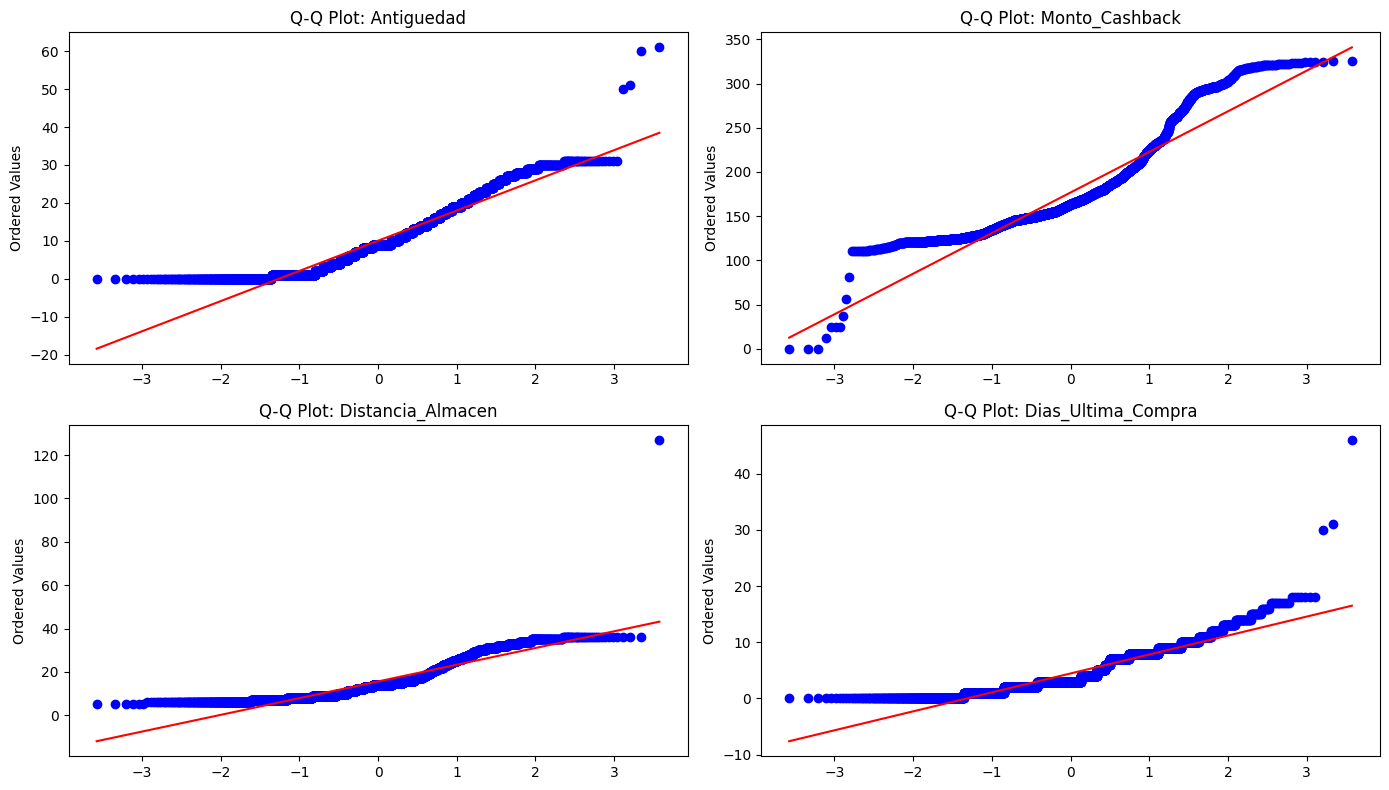

In [62]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(vars_continuas):
    ax = plt.subplot(2, 2, i+1)
    stats.probplot(datos[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

## Analisis Gráfico

### Histogramas 

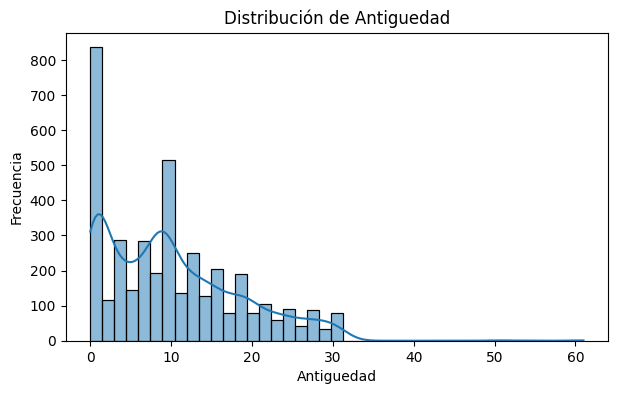

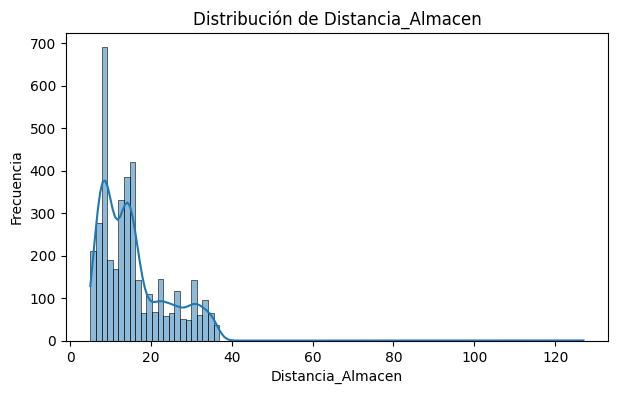

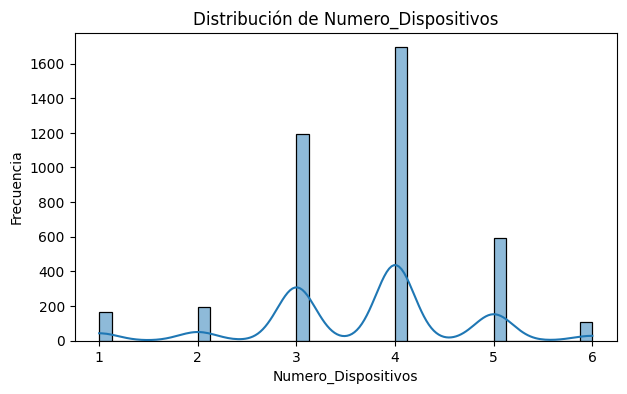

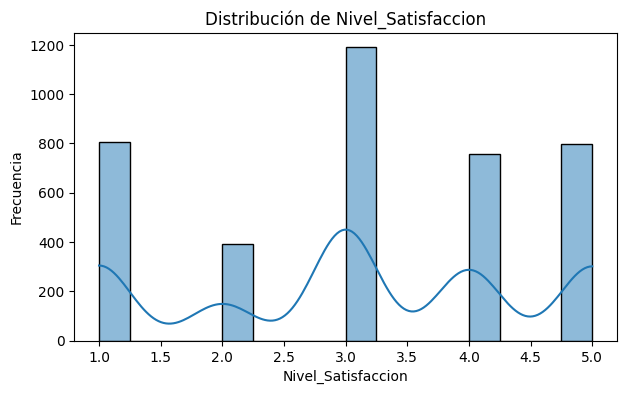

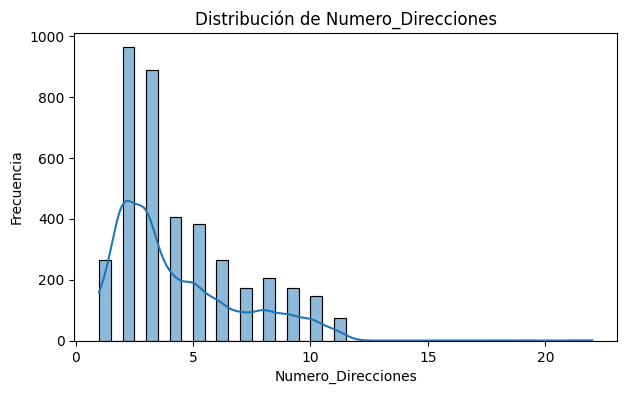

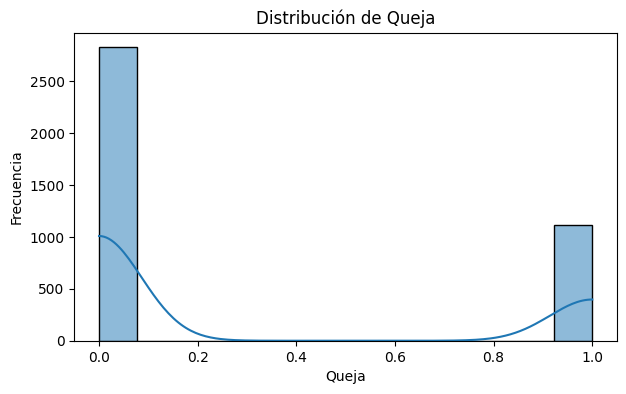

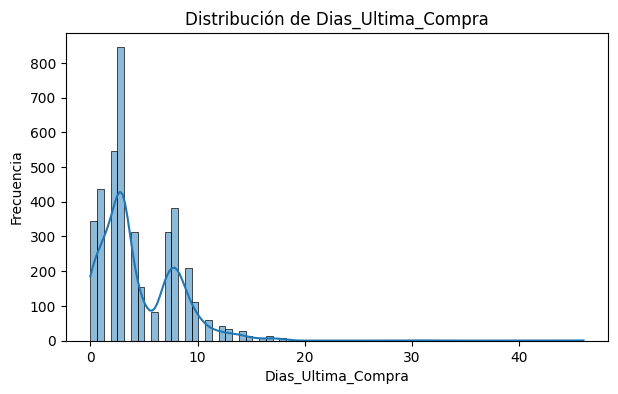

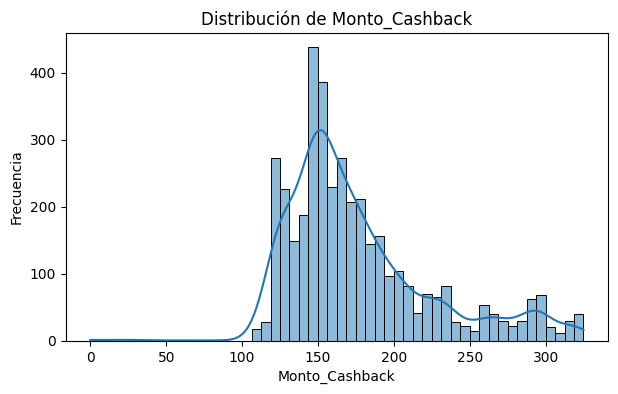

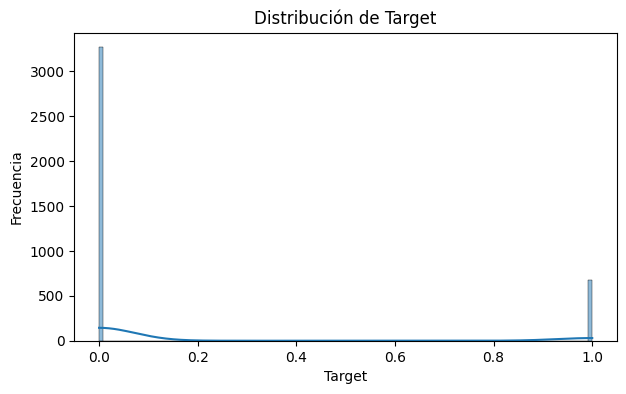

In [44]:
for col in numericas.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(datos_comportamiento[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


### Boxplots

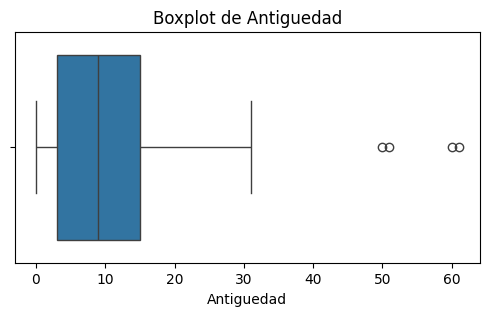

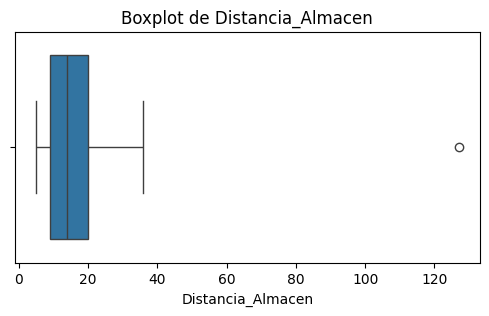

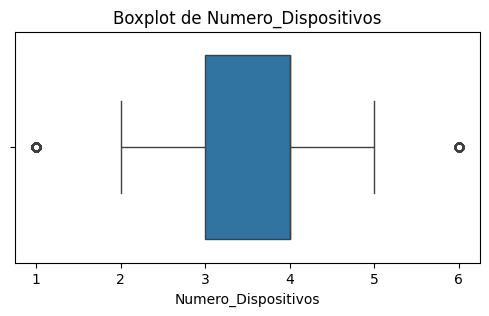

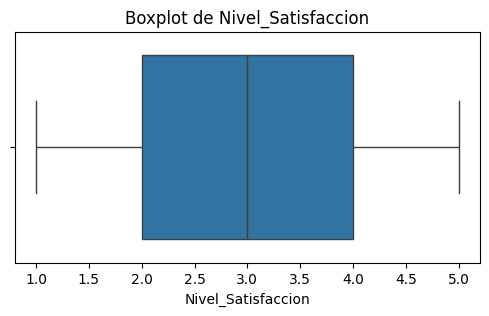

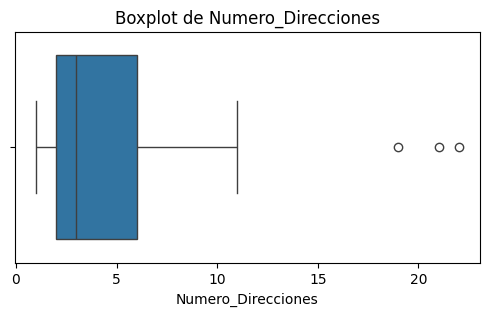

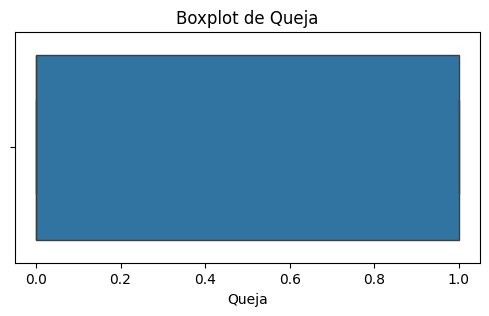

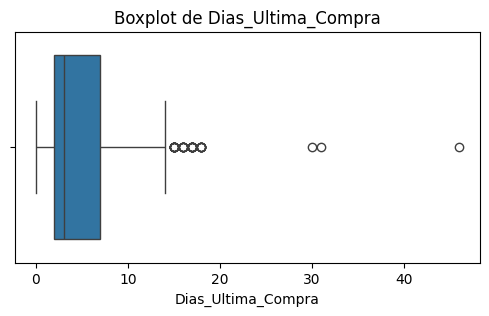

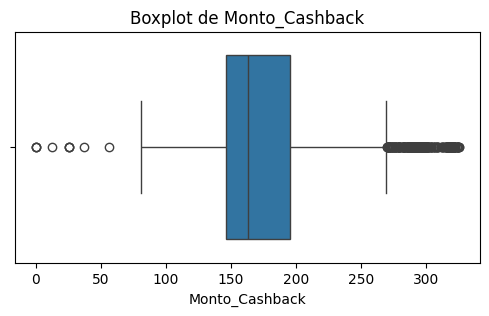

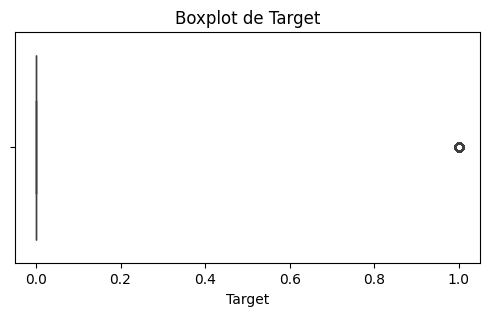

In [46]:
for col in numericas.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=datos_comportamiento[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

### Respuesta_a_Promocion

C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\48353059.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Categoria_Preferida', data=datos, palette='viridis')


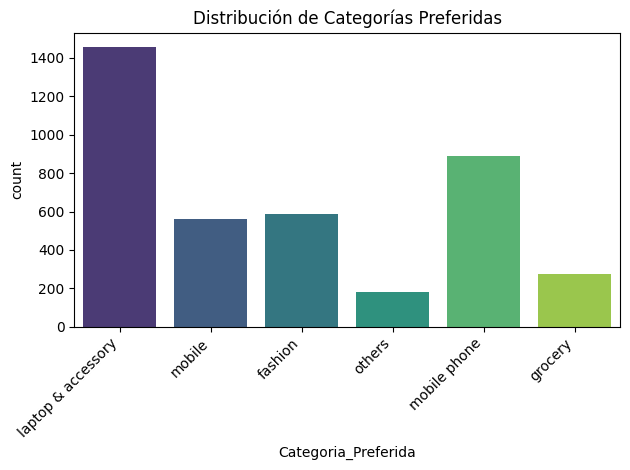

In [47]:
sns.countplot(x='Categoria_Preferida', data=datos, palette='viridis')
plt.title("Distribución de Categorías Preferidas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Estado Civil

C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\451765546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Estado_Civil', data=datos, palette='Set2')


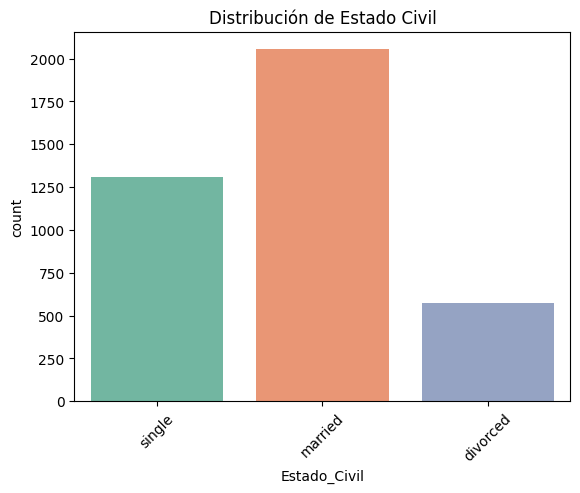

In [48]:
sns.countplot(x='Estado_Civil', data=datos, palette='Set2')
plt.title("Distribución de Estado Civil")
plt.xticks(rotation=45)
plt.show()

# Análisis Bivariado

## Relación entre Churn y variables categóricas

C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\505967254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=datos, palette='coolwarm', ax=ax[0])


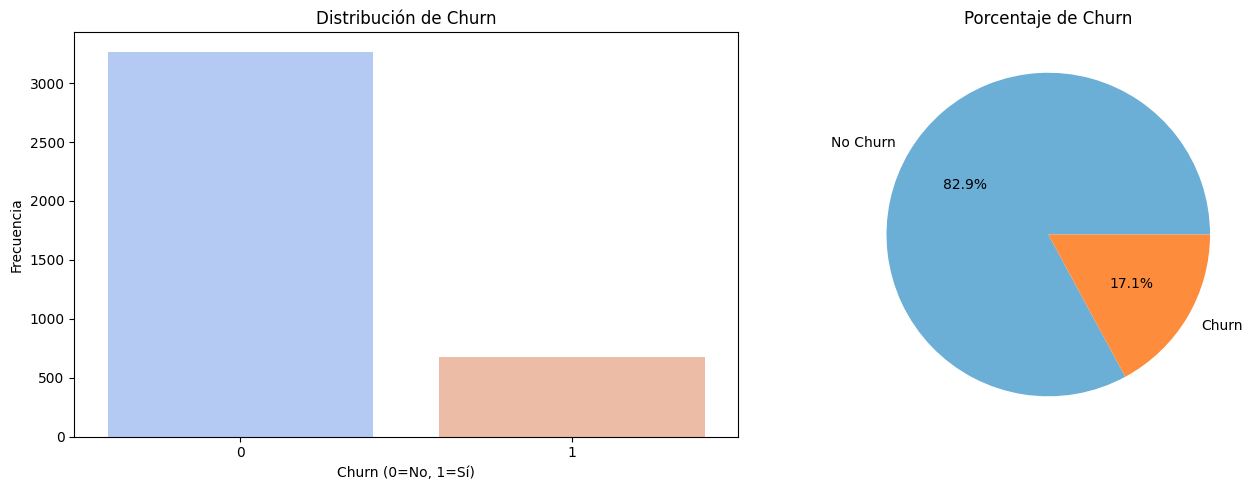

Clientes que abandonan: 674 (17.10%)
Clientes que permanecen: 3267 (82.90%)


In [49]:
# Distribución de Churn
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Countplot de Target
sns.countplot(x='Target', data=datos, palette='coolwarm', ax=ax[0])
ax[0].set_title("Distribución de Churn")
ax[0].set_xlabel("Churn (0=No, 1=Sí)")
ax[0].set_ylabel("Frecuencia")

# Porcentaje de Churn
churn_counts = datos['Target'].value_counts()
ax[1].pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=['#6baed6', '#fd8d3c'])
ax[1].set_title("Porcentaje de Churn")

plt.tight_layout()
plt.show()

print(f"Clientes que abandonan: {churn_counts[1]} ({churn_counts[1]/len(datos)*100:.2f}%)")
print(f"Clientes que permanecen: {churn_counts[0]} ({churn_counts[0]/len(datos)*100:.2f}%)")

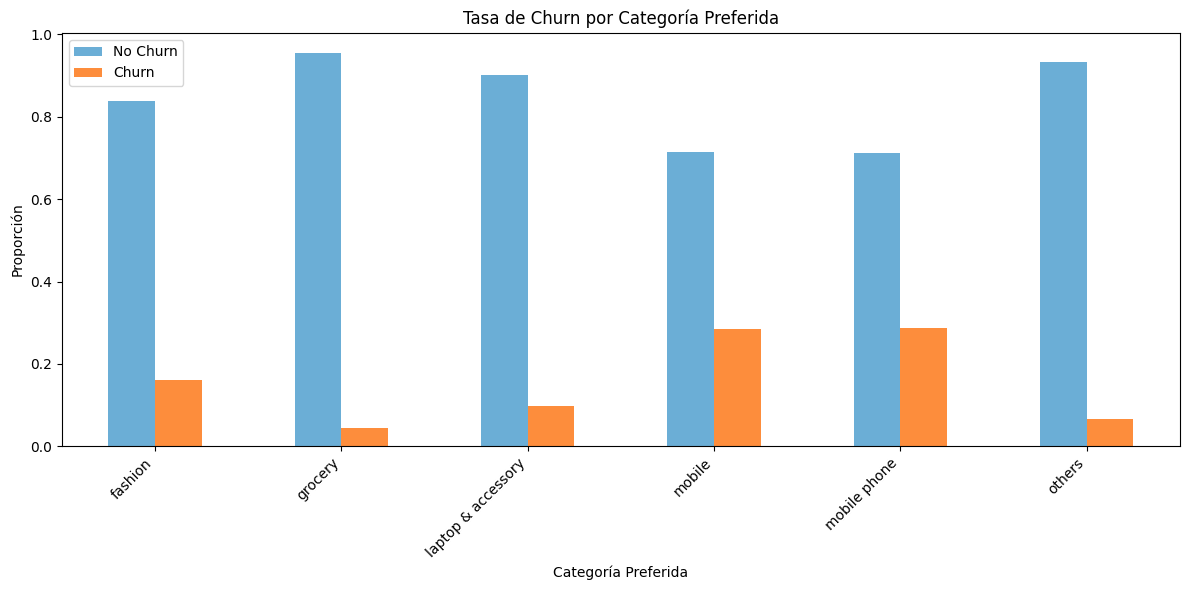

In [50]:
# Churn por Categoría Preferida
fig, ax = plt.subplots(figsize=(12, 6))
pd.crosstab(datos['Categoria_Preferida'], datos['Target'], normalize='index').plot(
    kind='bar', stacked=False, ax=ax, color=['#6baed6', '#fd8d3c']
)
plt.title("Tasa de Churn por Categoría Preferida")
plt.xlabel("Categoría Preferida")
plt.ylabel("Proporción")
plt.xticks(rotation=45, ha='right')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

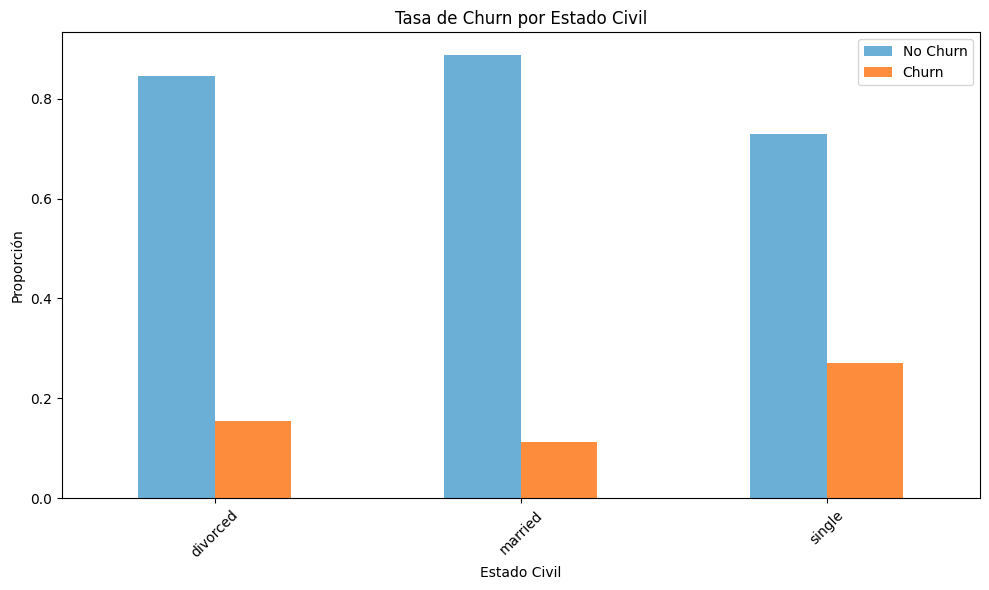

In [51]:
# Churn por Estado Civil
fig, ax = plt.subplots(figsize=(10, 6))
pd.crosstab(datos['Estado_Civil'], datos['Target'], normalize='index').plot(
    kind='bar', stacked=False, ax=ax, color=['#6baed6', '#fd8d3c']
)
plt.title("Tasa de Churn por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Proporción")
plt.xticks(rotation=45)
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

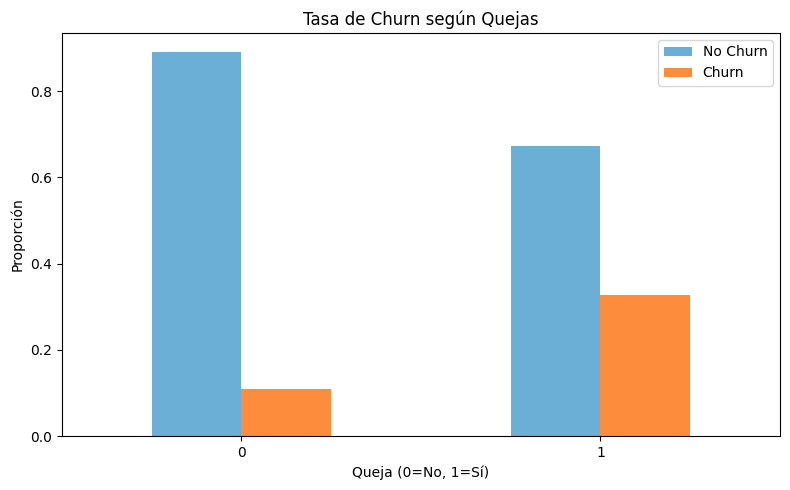

Distribución de quejas:
Target         0         1
Queja                     
0       0.890736  0.109264
1       0.672058  0.327942


In [52]:
# Impacto de Quejas en Churn
fig, ax = plt.subplots(figsize=(8, 5))
pd.crosstab(datos['Queja'], datos['Target'], normalize='index').plot(
    kind='bar', stacked=False, ax=ax, color=['#6baed6', '#fd8d3c']
)
plt.title("Tasa de Churn según Quejas")
plt.xlabel("Queja (0=No, 1=Sí)")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

# Estadísticas
print("Distribución de quejas:")
print(datos.groupby('Queja')['Target'].value_counts(normalize=True).unstack())

## Relación entre Churn y variables numéricas

C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\4025368519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=var, data=datos, palette='coolwarm', ax=axes[i])
C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\4025368519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=var, data=datos, palette='coolwarm', ax=axes[i])
C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\4025368519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=var, data=datos, palette='coolwarm', ax=axes[i])
C:\Users\Equipo\

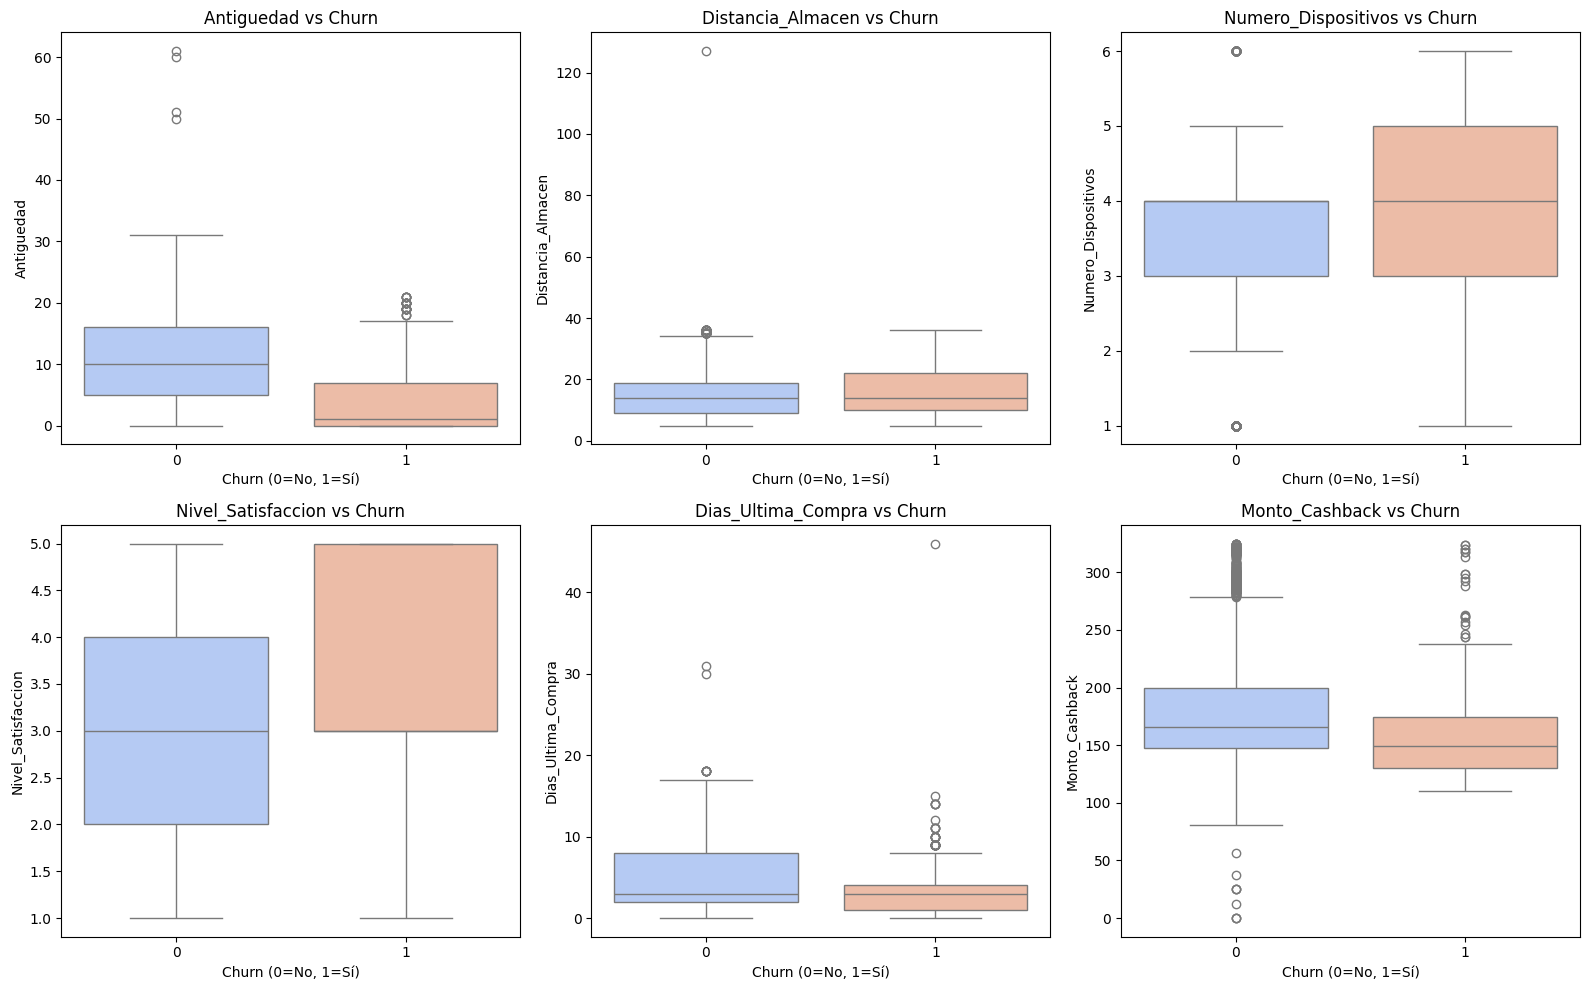

In [53]:
# Comparación de variables numéricas según Churn
variables_numericas = ['Antiguedad', 'Distancia_Almacen', 'Numero_Dispositivos', 
                       'Nivel_Satisfaccion', 'Dias_Ultima_Compra', 'Monto_Cashback']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(x='Target', y=var, data=datos, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
    axes[i].set_xlabel('Churn (0=No, 1=Sí)')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

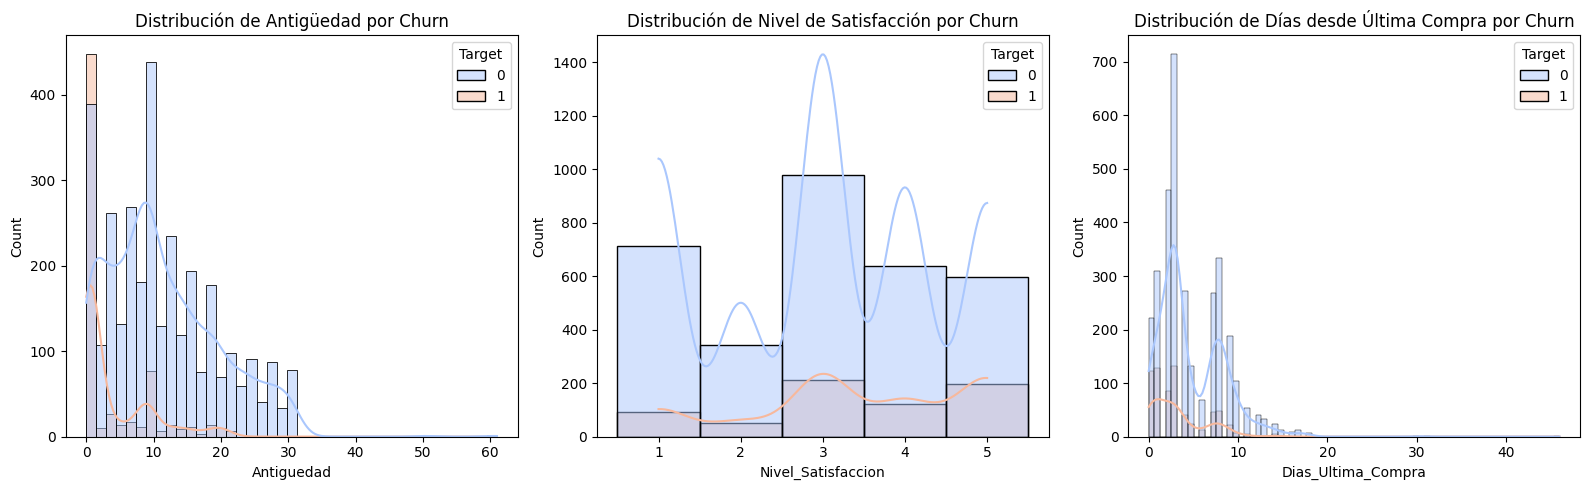

In [54]:
# Distribuciones superpuestas para variables clave
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Antiguedad
sns.histplot(data=datos, x='Antiguedad', hue='Target', kde=True, ax=axes[0], palette='coolwarm')
axes[0].set_title('Distribución de Antigüedad por Churn')

# Nivel de Satisfacción
sns.histplot(data=datos, x='Nivel_Satisfaccion', hue='Target', kde=True, ax=axes[1], palette='coolwarm', discrete=True)
axes[1].set_title('Distribución de Nivel de Satisfacción por Churn')

# Días desde última compra
sns.histplot(data=datos, x='Dias_Ultima_Compra', hue='Target', kde=True, ax=axes[2], palette='coolwarm')
axes[2].set_title('Distribución de Días desde Última Compra por Churn')

plt.tight_layout()
plt.show()

In [55]:
# Estadísticas descriptivas por grupo de Churn
print("=== Estadísticas por grupo de Churn ===\n")
for var in variables_numericas:
    print(f"\n{var}:")
    print(datos.groupby('Target')[var].describe())

=== Estadísticas por grupo de Churn ===


Antiguedad:
         count       mean       std  min  25%   50%   75%   max
Target                                                         
0       3267.0  11.330579  8.193671  0.0  5.0  10.0  16.0  61.0
1        674.0   3.715134  5.330295  0.0  0.0   1.0   7.0  21.0

Distancia_Almacen:
         count       mean       std  min   25%   50%   75%    max
Target                                                           
0       3267.0  15.330272  8.244366  5.0   9.0  14.0  19.0  127.0
1        674.0  16.789318  8.327266  5.0  10.0  14.0  22.0   36.0

Numero_Dispositivos:
         count      mean       std  min  25%  50%  75%  max
Target                                                     
0       3267.0  3.629324  1.009767  1.0  3.0  4.0  4.0  6.0
1        674.0  3.921365  0.999875  1.0  3.0  4.0  5.0  6.0

Nivel_Satisfaccion:
         count      mean       std  min  25%  50%  75%  max
Target                                                     
0  

# Analisis Multivariado

## Matriz de correlación

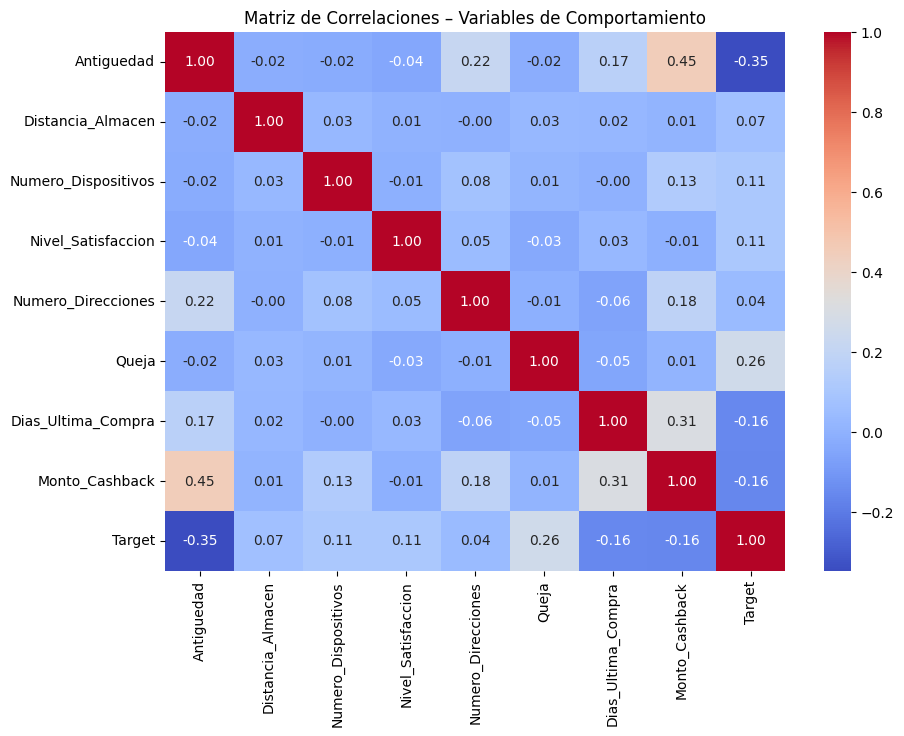

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Nivel_Satisfaccion,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
Antiguedad,1.000000,-0.019175,-0.022265,-0.042268,0.221866,-0.017975,0.167483,0.453206,-0.345922
Distancia_Almacen,-0.019175,1.000000,0.029336,0.006175,-0.002105,0.029950,0.022517,0.009719,0.066391
Numero_Dispositivos,-0.022265,0.029336,1.000000,-0.005504,0.077813,0.013885,-0.001580,0.128373,0.108464
Nivel_Satisfaccion,-0.042268,0.006175,-0.005504,1.000000,0.047638,-0.033975,0.031252,-0.006496,0.107541
Numero_Direcciones,0.221866,-0.002105,0.077813,0.047638,1.000000,-0.005070,-0.061918,0.182821,0.039195
Queja,-0.017975,0.029950,0.013885,-0.033975,-0.005070,1.000000,-0.047124,0.010934,0.261450
Dias_Ultima_Compra,0.167483,0.022517,-0.001580,0.031252,-0.061918,-0.047124,1.000000,0.311210,-0.156002
Monto_Cashback,0.453206,0.009719,0.128373,-0.006496,0.182821,0.010934,0.311210,1.000000,-0.161535
Target,-0.345922,0.066391,0.108464,0.107541,0.039195,0.261450,-0.156002,-0.161535,1.000000


In [ ]:
corr = datos[variables_comportamiento].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaciones – Variables de Comportamiento")
plt.show()

corr


## Matriz de disperción

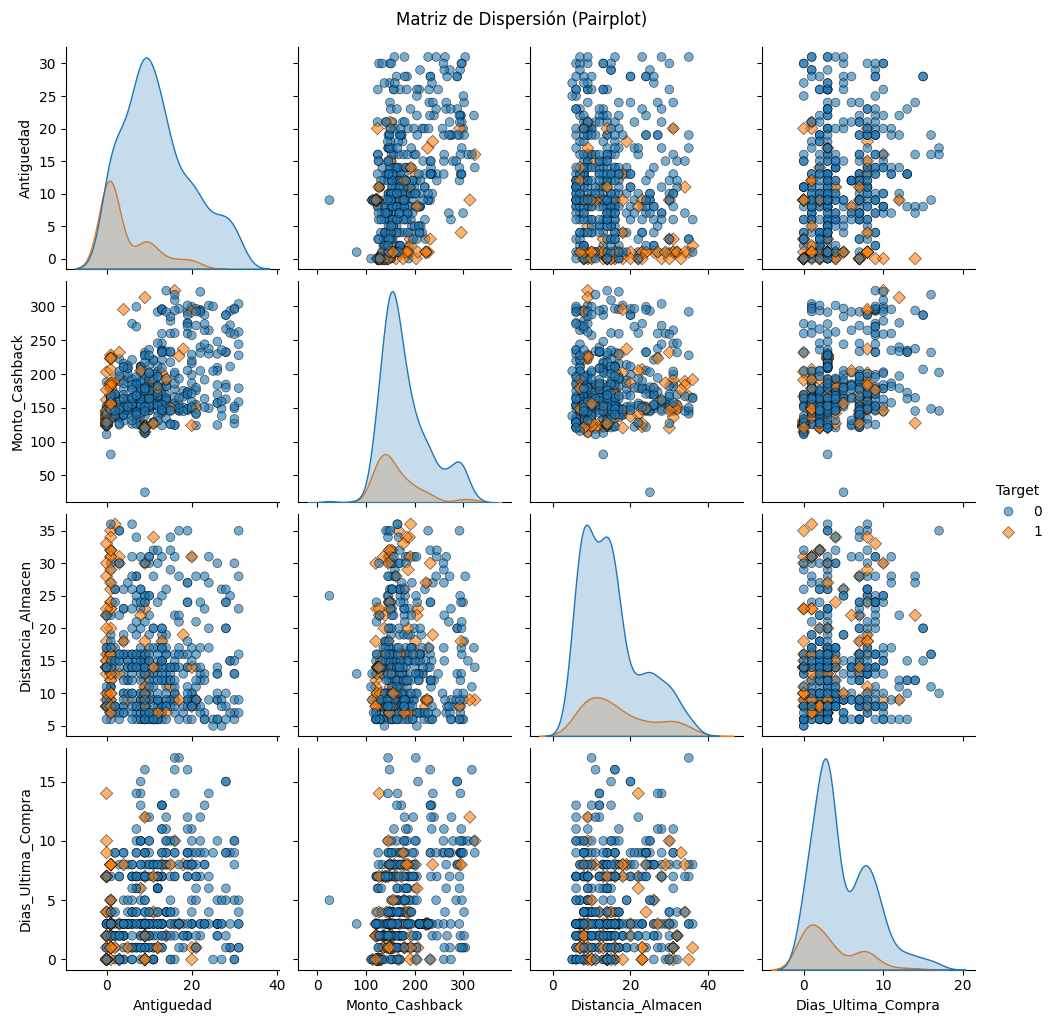

In [ ]:
sns.pairplot(datos[vars_continuas + ['Target']].sample(500), 
             hue='Target',
             markers=["o", "D"],              
             diag_kind="kde",                 
             plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'}, 
             height=2.5)
plt.suptitle('Matriz de Dispersión (Pairplot)', y=1.02)
plt.show()

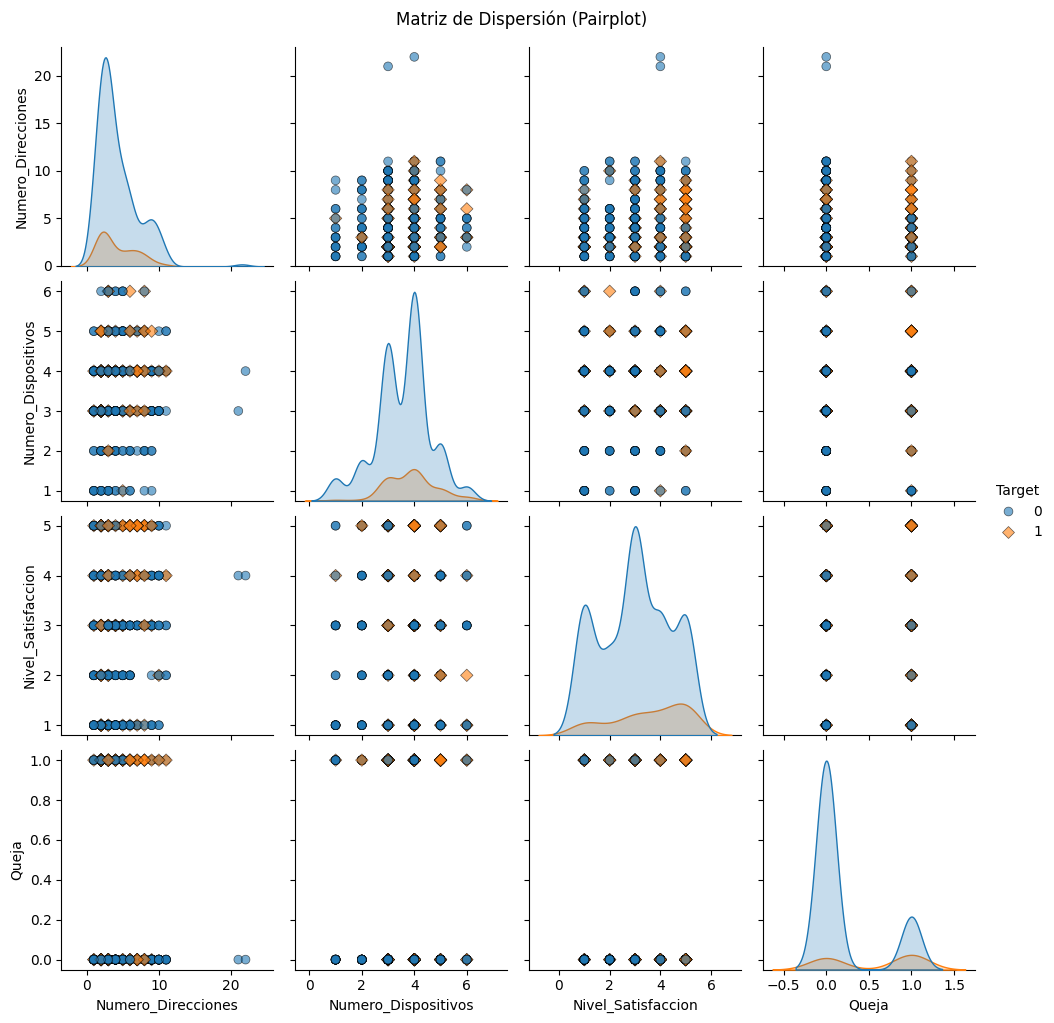

In [ ]:
sns.pairplot(datos[vars_discretas + ['Target']].sample(500), 
             hue='Target',
             markers=["o", "D"],              
             diag_kind="kde",                 
             plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'}, 
             height=2.5)
plt.suptitle('Matriz de Dispersión (Pairplot)', y=1.02)
plt.show()

## Detección de Outliers multivariados

In [ ]:
df_mahal = datos[vars_continuas]

# Calculamos la matriz de covarianza y su inversa
cov_matrix = np.cov(df_mahal.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_dist = df_mahal.mean().values

# Calculamos la distancia para cada punto
df_mahal['Mahalanobis'] = df_mahal.apply(
    lambda row: mahalanobis(row, mean_dist, inv_cov_matrix), axis=1
)

C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\1698395991.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mahal['Mahalanobis'] = df_mahal.apply(


In [ ]:
# Calculamos el p-valor basado en la distribución Chi-cuadrado
# Grados de libertad = número de variables
df_mahal['p_value'] = 1 - stats.chi2.cdf(df_mahal['Mahalanobis']**2, len(vars_continuas))

# Identificamos outliers (p-value < 0.001 es un criterio estándar)
outliers_multivariados = df_mahal[df_mahal['p_value'] < 0.001]

print(f"Detección de Outliers Multivariados:")
print(f"Se detectaron {len(outliers_multivariados)} casos anómalos en su estructura conjunta.")
print("Casos de outliers multivariados:")
print(outliers_multivariados.head())


Detección de Outliers Multivariados:
Se detectaron 15 casos anómalos en su estructura conjunta.
Casos de outliers multivariados:
      Antiguedad  Monto_Cashback  Distancia_Almacen  Dias_Ultima_Compra  \
51          61.0          303.75               28.0                 1.0   
181          3.0          132.04               11.0                30.0   
235         18.0          288.28               35.0                18.0   
449         51.0          174.00                7.0                 9.0   
1209        60.0          278.75               27.0                 0.0   

      Mahalanobis       p_value  
51       6.692358  4.401351e-09  
181      7.922275  7.613910e-13  
235      4.558301  3.504124e-04  
449      5.769435  1.043593e-06  
1209     6.632137  6.461202e-09  


C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\4146747279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mahal['p_value'] = 1 - stats.chi2.cdf(df_mahal['Mahalanobis']**2, len(vars_continuas))


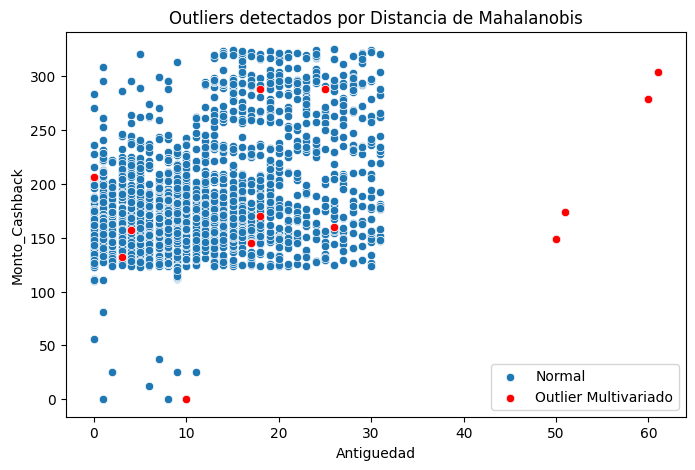

In [ ]:
# Visualizamos los outliers en un gráfico de dispersión 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_mahal, x='Antiguedad', y='Monto_Cashback', label='Normal')
sns.scatterplot(data=outliers_multivariados, x='Antiguedad', y='Monto_Cashback', color='red', label='Outlier Multivariado')
plt.title('Outliers detectados por Distancia de Mahalanobis')
plt.legend()
plt.show()

## Analisis de Componentes Principales PCA

In [ ]:
vars_num_pca = ['Antiguedad', 'Monto_Cashback', 'Distancia_Almacen', 
                'Dias_Ultima_Compra', 'Numero_Dispositivos', 'Nivel_Satisfaccion']

# PCA es sensible a la escala, así que usamos StandardScaler
X_scaled = StandardScaler().fit_transform(datos[vars_num_pca].dropna())

# Reducir a 2 dimensiones
pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)

# Crear un DataFrame temporal para graficar
df_pca = pd.DataFrame(data=componentes, columns=['PC1', 'PC2'])

# Necesitamos alinear los índices en caso de haber borrado nulos antes
df_pca['Target'] = datos['Target'].iloc[df_pca.index].values 


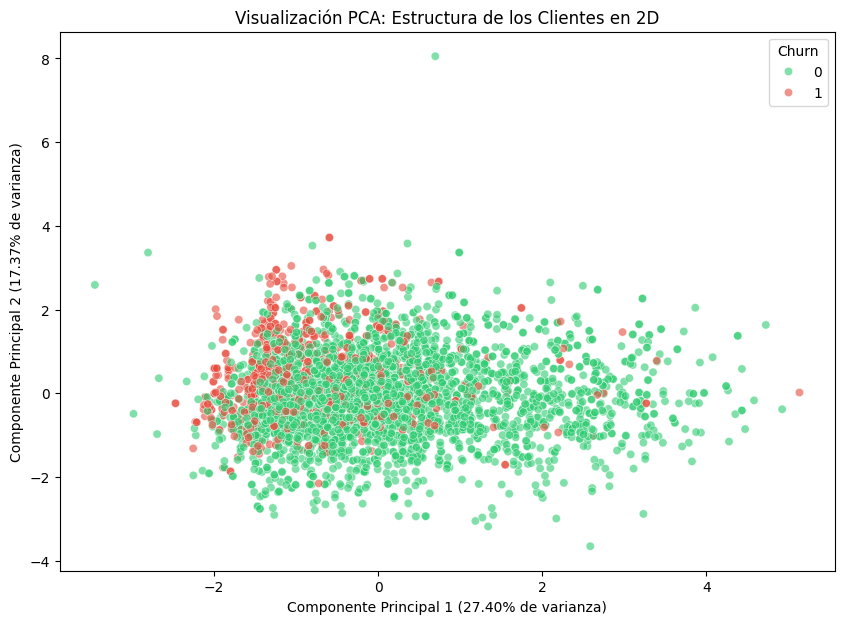

Varianza total explicada por los 2 componentes: 44.77%


In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='Target', 
    data=df_pca, 
    palette={0: "#2ecc71", 1: "#e74c3c"}, 
    alpha=0.6
)
plt.title('Visualización PCA: Estructura de los Clientes en 2D')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.2%} de varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.2%} de varianza)')
plt.legend(title='Churn')
plt.show()

print(f"Varianza total explicada por los 2 componentes: {sum(pca.explained_variance_ratio_):.2%}")

## Analisis de variables Categóricas

In [ ]:
vars_categoricas = ['Estado_Civil', 'Categoria_Preferida'] 

print("--- TEST DE INDEPENDENCIA CHI-CUADRADO (vs Churn) ---")
print(f"{'Variable':<25} | {'P-Valor':<12} | {'¿Hay Relación?'}")

for col in vars_categoricas:
    # Crear tabla de contingencia (Crosstab)
    tabla = pd.crosstab(datos[col], datos['Target'])
    
    # Ejecutar test
    chi2, p_value, dof, expected = chi2_contingency(tabla)
    
    # Interpretación (Alpha 0.05)
    relacion = "SI" if p_value < 0.05 else "NO"
    
    print(f"{col:<25} | {p_value:<12.2e} | {relacion}")

print("\nNota: Si el P-Valor < 0.05, la variable influye significativamente en la decisión de abandonar.")

--- TEST DE INDEPENDENCIA CHI-CUADRADO (vs Churn) ---
Variable                  | P-Valor      | ¿Hay Relación?
Estado_Civil              | 5.17e-32     | SI
Categoria_Preferida       | 4.30e-49     | SI

Nota: Si el P-Valor < 0.05, la variable influye significativamente en la decisión de abandonar.


C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\1327069631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_churn.index, y=tasa_churn.values, ax=ax[i], palette='Reds_r')
C:\Users\Equipo\AppData\Local\Temp\ipykernel_17344\1327069631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_churn.index, y=tasa_churn.values, ax=ax[i], palette='Reds_r')


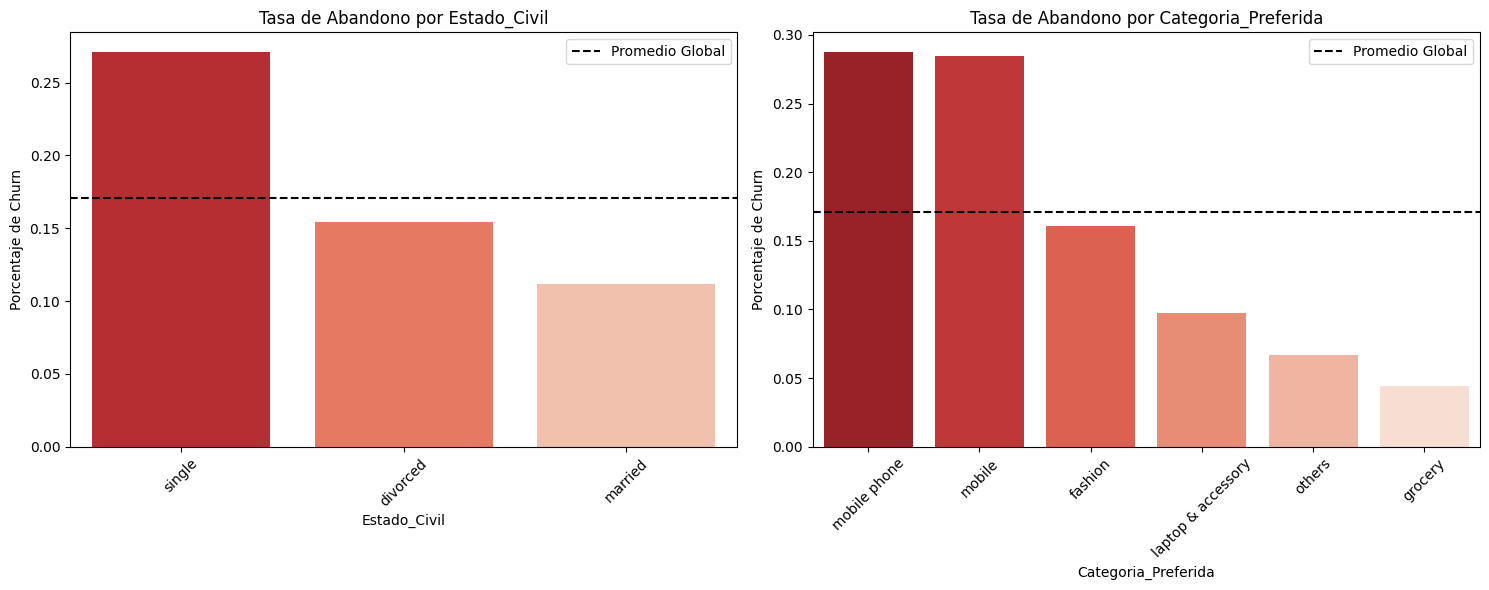

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Calculamos el promedio de Target (que es la tasa de churn) por categoría
for i, col in enumerate(['Estado_Civil', 'Categoria_Preferida']):
    tasa_churn = datos.groupby(col)['Target'].mean().sort_values(ascending=False)
    sns.barplot(x=tasa_churn.index, y=tasa_churn.values, ax=ax[i], palette='Reds_r')
    ax[i].set_title(f'Tasa de Abandono por {col}')
    ax[i].set_ylabel('Porcentaje de Churn')
    ax[i].tick_params(axis='x', rotation=45)
    
    # Línea promedio global para referencia
    ax[i].axhline(datos['Target'].mean(), color='k', linestyle='--', label='Promedio Global')
    ax[i].legend()

plt.tight_layout()
plt.show()

# Insights y Conclusiones del EDA

=== Correlaciones con Churn (Target) ===
Target                 1.000000
Queja                  0.261450
Numero_Dispositivos    0.108464
Nivel_Satisfaccion     0.107541
Distancia_Almacen      0.066391
Numero_Direcciones     0.039195
Dias_Ultima_Compra    -0.156002
Monto_Cashback        -0.161535
Antiguedad            -0.345922
Name: Target, dtype: float64


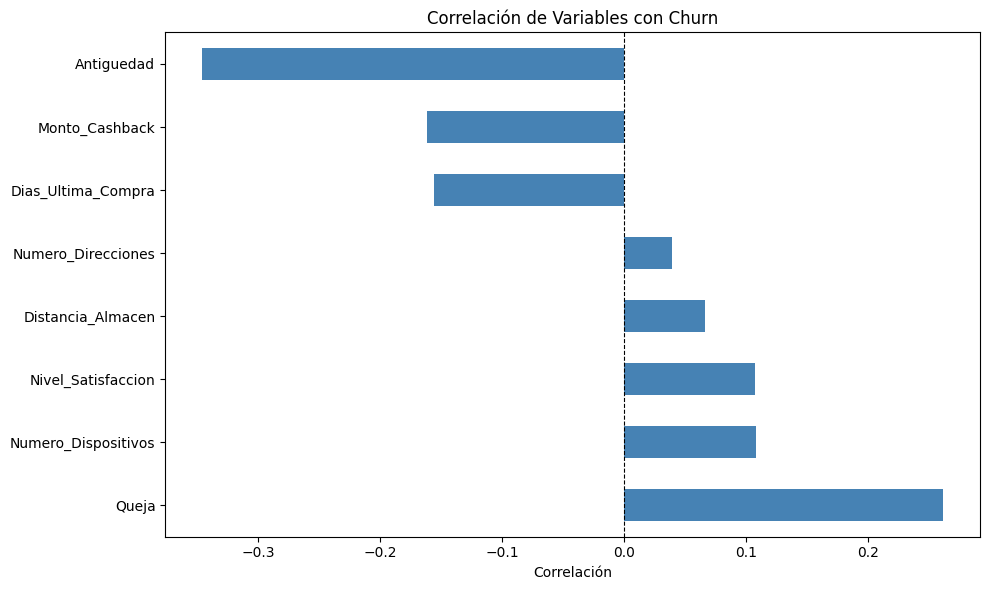

In [56]:
# Resumen de correlaciones con Target
correlaciones_target = datos[variables_comportamiento].corr()['Target'].sort_values(ascending=False)
print("=== Correlaciones con Churn (Target) ===")
print(correlaciones_target)

# Visualización
plt.figure(figsize=(10, 6))
correlaciones_target.drop('Target').plot(kind='barh', color='steelblue')
plt.title('Correlación de Variables con Churn')
plt.xlabel('Correlación')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## Principales Hallazgos

### Variables más correlacionadas con Churn:
1. **Queja**: Los clientes que presentan quejas tienen mayor probabilidad de abandonar
2. **Antigüedad**: Clientes nuevos (baja antigüedad) tienen mayor riesgo de churn
3. **Días desde última compra**: Mayor tiempo sin comprar aumenta el riesgo
4. **Nivel de Satisfacción**: Menor satisfacción está asociada con mayor churn

### Recomendaciones para el modelo:
- Priorizar variables: Queja, Antigüedad, Nivel_Satisfaccion, Dias_Ultima_Compra
- Considerar ingeniería de features con Categoria_Preferida y Estado_Civil
- Tratar valores nulos en Dias_Ultima_Compra, Antiguedad y Distancia_Almacen
- Evaluar balanceo de clases para Target
- Analizar interacciones entre Queja y otras variables de satisfacción

### Normalidad
Se analizò las variables continuas del sataset y se halló que ninguna siguie una sitribución normal.

### Correlaciones entre las variables
Es importante notar que las correlaciones lineales individuales entre las variables numéricas y el target resultaron moderadas o bajas. Esto no implica que las variables sean inútiles, sino que su poder predictivo no es lineal. Un cliente no abandona simplemente "porque gasta menos", sino por una combinación compleja de factores.

Dado que el test de Kolmogorov-Smirnov rechazó la hipótesis de normalidad para todas las variables numéricas individuales, se concluye por propiedad estadística que el conjunto de datos no sigue una distribución normal multivariada.
Esto refuerza la decisión de utilizar métodos robustos y no paramétricos para la detección de outliers (como la distancia de Mahalanobis, que aunque asume normalidad, es una medida de distancia útil) y para el modelado predictivo (Árboles de Decisión).

### Análisis de Componentes Principales PCA
Se utilizó PCA para reducir la dimensionalidad de las variables numéricas y visualizar la separabilidad de las clases en un espacio 2D.

No existe una frontera lineal clara que separe a los clientes que abandonan de los que se quedan basándose únicamente en las variables numéricas. Esto sugiere que el fenómeno del churn es multifactorial y requerirá modelos no lineales

### Deteción de outliers

#### Outliers univariados
Son valores extremos aislados pero no representa valores imposibles como por ejemplo un valor de antiguedad negativo.

### Outliers multivariados
Se evaluó la coherencia de los datos mediante la Distancia de Mahalanobis ($D^2$), identificando casos que, aunque individualmente parezcan normales, presentan combinaciones de valores atípicas.

- Resultados: Se detectaron 15 outliers multivariados, aprox. 0.4% de la muestra, con p-valores extremadamente bajos ($< 1e^{-9}$), lo que confirma su anomalía estadística.

- Casos Notables: 
    - Caso 181: Un cliente con Antigüedad mínima (3.0) pero una inactividad reciente alta, 30 días sin comprar. Este patrón rompe la correlación esperada de "alta actividad inicial" en clientes nuevos.
    - Caso 51: Un "Super Usuario" con métricas extremas en casi todas las dimensiones, Antigüedad 61, Cashback 303, alejándose drásticamente del centroide de la población.

- Acción:Una posible solución sería eliminarlos para mejorar la robustez del modelo.

### Análisis de Dependencia Categórica Chi-Cuadrado

Se evaluó la relación entre las variables categóricas y la variable objetivo mediante el Test de Independencia $\chi^2$.

- Resultados:
    - Estado Civil: $p < 5.17e^{-32}$ lo que significa que la relación es significativa.
    - Categoría Preferida: $p < 4.30e^{-49}$ lo que significa que la relación es significativa.
- Interpretación: Se rechaza la hipótesis nula de independencia con un nivel de confianza superior al 99.9%. Ambas variables categóricas son predictores determinantes del abandono. 

# Resumen de Acciones Previas al Modelado
Para maximizar el rendimiento de estos modelos, se debería de proceder a:

* Limpieza: Excluir los 15 outliers multivariados detectados para reducir el ruido.
* Codificación: Aplicar One-Hot Encoding a "Estado Civil" y "Categoría Preferida", variables validadas como críticas por el test Chi-Cuadrado.
* Validación: Utilizar métricas como ROC-AUC y F1-Score en lugar de solo Accuracy, dado el desbalance de clases típico en problemas de churn.

# Recomendación de Modelos de Machine Learning y Análisis de Impacto

Basado en los resultados del Análisis Exploratorio de Datos (EDA), se desaconseja el uso de modelos lineales simples y se recomienda priorizar algoritmos no paramétricos y basados en ensambles. A continuación se detalla la justificación y los candidatos ideales:

## Modelos Recomendados

### XGBoost / LightGBM
* Justificación: Estos algoritmos son ideal para problemas de clasificación tabular complejos como el churn. Su capacidad para manejar interacciones automáticas entre variables; ej. detectar que "Antigüedad baja" + "Queja" = Alto Riesgo, es mejor a la de modelos más simples.

### Random Forest
* Justificación: Dado que las variables numéricas no siguen una distribución normal y el PCA demostró que las clases no son linealmente separables, Random Forest es un buen modelo por su capacidad para manejar relaciones no lineales y distribuciones arbitrarias sin requerir transformación de datos. Además, es robusto frente a outliers que no hayan sido eliminados.

### Árboles de Decisión
* Justificación: Aunque menos potente que los anteriores, puede ser útil como modelo base  explicativo. Su estructura de reglas permite validar fácilmente si el modelo está capturando los patrones de negocio detectados en el EDA.

### K-Vecinos Más Cercanos KNN
* Justificación: Al ser un método no paramétrico, no asume que los datos sigan una distribución normal. Esto es ideal para este dataset, ya que la prueba de Kolmogorov-Smirnov rechazó la normalidad en todas las variables numéricas. Además, KNN puede adaptarse a fronteras de decisión irregulares, lo cual es necesario dada la mezcla de clases observada en el PCA.

### Máquinas de Vectores de Soporte SVM
* Justificación: El análisis de PCA mostró que las clases "Churn" y "No Churn" no son linealmente separables. Por lo tanto, un SVM lineal fallaría. Sin embargo, la aplicación del "Truco del Kernel", Kernel RBF, permitiría proyectar los datos a una dimensión superior para encontrar una separación no lineal.

## Modelos Desaconsejados

### Regresión Logística y Naive Bayes
* Justificación: Se desaconsejan como modelos principales debido a la violación de supuestos estadísticos, como la normalidad y la incapacidad de separar las clases linealmente, como evidenció el gráfico de PCA. Su uso requeriría transformaciones agresivas de los datos que podrían perder información.

### Regresión Logística Polinómica
* Justificación: Si bien permite capturar relaciones no lineales, presenta un riesgo alto de La Maldición de la Dimensionalidad. Al aplicar One-Hot Encoding a las variables categóricas ("Estado Civil", "Categoría"), el número de columnas aumentará. Elevar estas columnas a grados polinómicos generaría una explosión en la cantidad de features, provocando un modelo lento y propenso al sobreajuste (overfitting).

### Análisis Discriminante Lineal LDA
* Justificación: El LDA asume teóricamente que las variables predictoras siguen una distribución normal y que las matrices de covarianza son iguales. Nuestro EDA ha demostrado que se violan estos supuestos (distribuciones sesgadas en Antiguedad y Cashback, además de la no normalidad según K-S).
